## Neural Network trained on Mnist Fashion Dataset

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(len(train_images))

60000


In [4]:
print(len(test_images))

10000


In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Class Label :  2


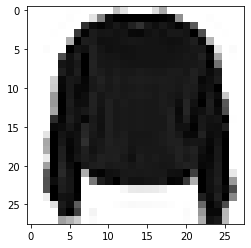

In [6]:
import matplotlib.pyplot as plt
digit=train_images[7]
print("Class Label : ",train_labels[7])
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

Class Label :  9


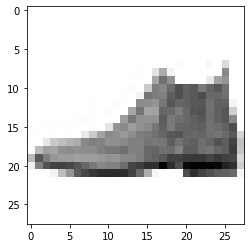

In [7]:
digit1=test_images[0]
print("Class Label : ",test_labels[0])
plt.imshow(digit1,cmap=plt.cm.binary)
plt.show()

In [8]:
import numpy as np
print(train_labels)
print(np.unique(train_labels))

[9 0 0 ... 3 0 5]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
print(test_labels)
print(np.unique(test_labels))

[9 2 1 ... 8 1 5]
[0 1 2 3 4 5 6 7 8 9]


# Network Architecture

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models
network=models.Sequential()


network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

# Compilation Steps

In [11]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [12]:
train_images.ndim

3

# Preparing Image Data and Normalization



In [13]:
train_images=train_images.reshape(60000,28*28)
train_images=train_images.astype('float32')/255

test_images=test_images.reshape(10000,28*28)
test_images=test_images.astype('float32')/255

In [14]:
train_labels[9]

5

# One Hot Coding

In [15]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
train_labels[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Train Your Model

In [18]:
network.fit(train_images , train_labels , epochs=5 , batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.7503 - accuracy: 0.7427
Epoch 2/5
469/469 [==============================] - 4s 7ms/step - loss: 0.3921 - accuracy: 0.8570
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3446 - accuracy: 0.8732
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3179 - accuracy: 0.8818
Epoch 5/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2926 - accuracy: 0.8929


In [21]:
test_loss,test_acc=network.evaluate(test_images,test_labels)
print('Test Acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3704 - accuracy: 0.8730
Test Acc: 0.8730000257492065
